# Seeing Faces Clearly: PCA in Action

## Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [2]:
# iterate through all folders, load each image

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)

randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

# split
trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

# 112x92 (= 10304) grayscale images,  360 in train, 40 in test
print(trainFaces.shape, trainLabels.shape)

(360, 112, 92) (360,)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [3]:
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import matplotlib.pyplot as plt

def reshape_array(X):
    z, x, y = X.shape
    return X.reshape((z, x * y))
    
def principalComponentAnalysis(X, numComponents):
    #i am calling reshape function to use these matrices araay to convert it into a single huge matrix of 360*10304
    reshaped_matrix = reshape_array(X)
    #print(reshaped_matrix)
    #standaraadizing the matrix values
    standardized_matrix = StandardScaler().fit_transform(reshaped_matrix)
    #print(standardized_matrix)

    sample_data = standardized_matrix
    cov_matrix = np.matmul(sample_data.T , sample_data)
    print(cov_matrix.shape)

    #compute eigen vakues and eigen vectors
    start = 10304 - numComponents
    end = 10304 - 1
    #topeig = np.arange(start, end)
    values , vectors = eigh(cov_matrix , eigvals=(start,end))
    #print(vectors.shape)    #shape is of format 10304*k
    #transpose of vectors to be taken because we are to mulatiply it with k*10304  *  10304*360   to get k*360
    vectors = vectors.T
    new_coordinates = np.matmul(vectors , sample_data.T)
    print("resulatant new data points shape" , vectors.shape , " x " , sample_data.T.shape , " = " ,new_coordinates.shape)
    """
    Implement pca in the following function by taking the following arguements:
    1. X(images array)
    2. number of components
    The function must return the eigen vectors (principal components) also termed "Eigen faces"
    """

    # your code here

    return vectors

(10304, 10304)
resulatant new data points shape (100, 10304)  x  (10304, 360)  =  (100, 360)


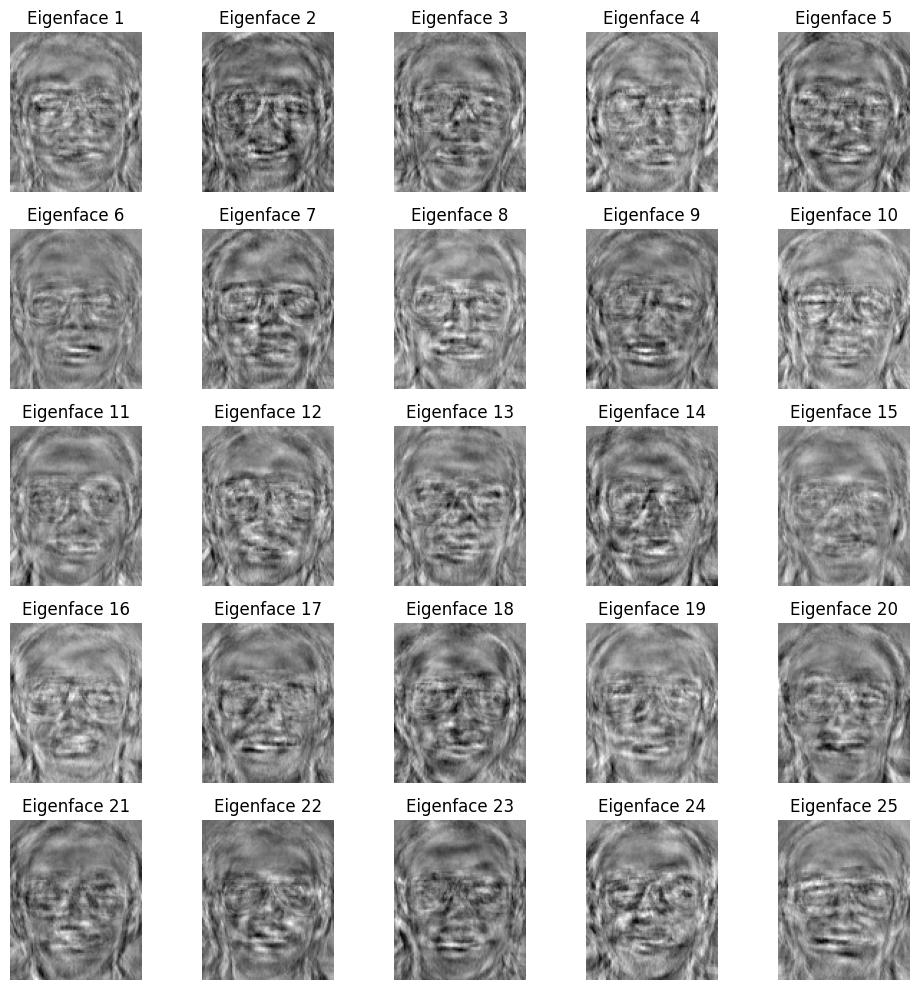

In [13]:
#eigen face plot
eigenfaces = principalComponentAnalysis(trainFaces,100)
%matplotlib inline
def plot_eigenfaces(eigenfaces, nrows, ncols, image_shape):
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))

    for i, ax in enumerate(axes.flat):
        ax.imshow(eigenfaces[i].reshape(image_shape), cmap='gray')
        ax.set_title(f'Eigenface {i+1}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()
nrows = 5  
ncols = 5  

image_shape = (112, 92)  # Example shape for AT&T face images

plot_eigenfaces(eigenfaces, nrows, ncols, image_shape)

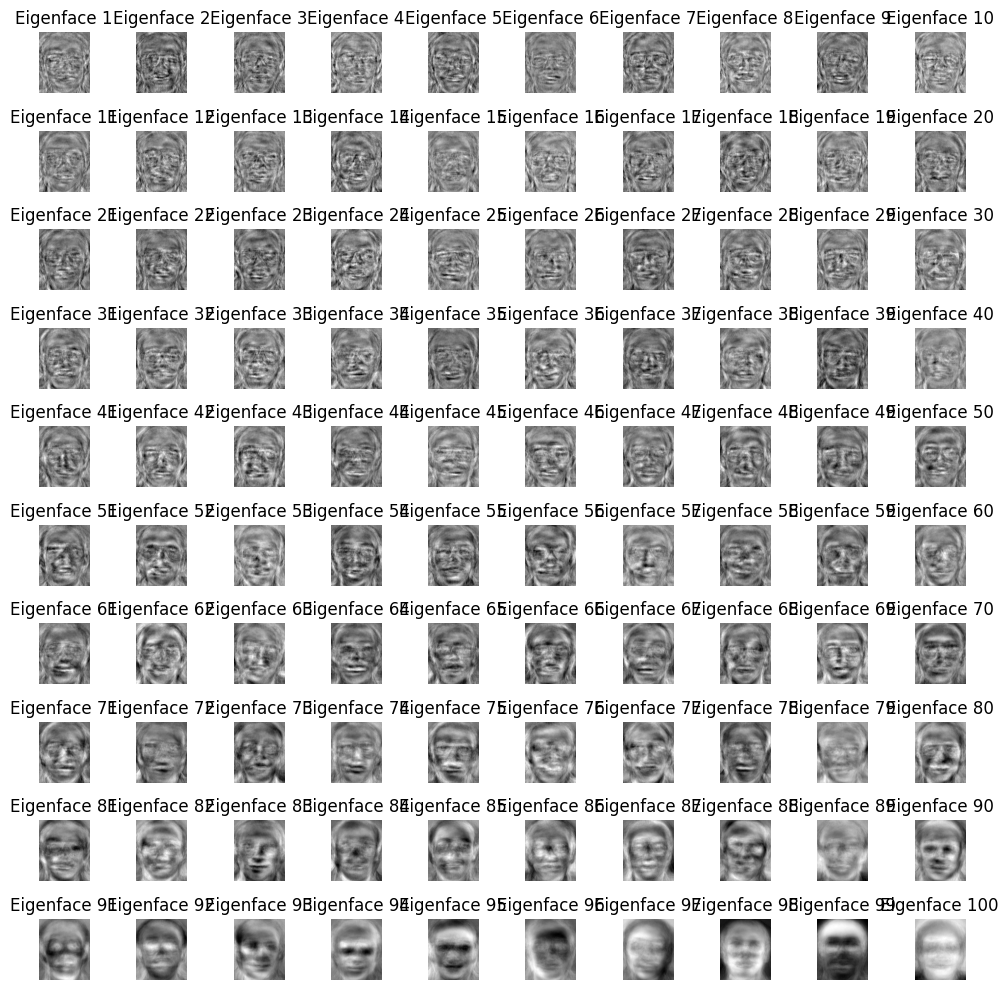

In [15]:
plot_eigenfaces(eigenfaces, 10, 10, image_shape)

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [16]:
def findMeanFace(X):
    mean_face = np.mean(X, axis=0)
    return mean_face

def reshape_arrayagain(X):
    x, y = X.shape
    return X.reshape((1, x * y))
    
def imageReconstruction(testFace, eigenFaces, meanFace):
    """
    Helper function to reconstruct images
    """

    num_components = eigenFaces.shape[0]
    
    test_face_normalized = testFace - meanFace
    
    reshapeface = reshape_arrayagain(test_face_normalized)
    weights = np.dot(reshapeface, eigenFaces.T)

    reshapemean = reshape_arrayagain(meanFace)
    reconstructed_image = reshapemean + np.dot(weights, eigenFaces)
    
    return reconstructed_image
    
meanFace = findMeanFace(trainFaces)
meanFace.shape

(112, 92)

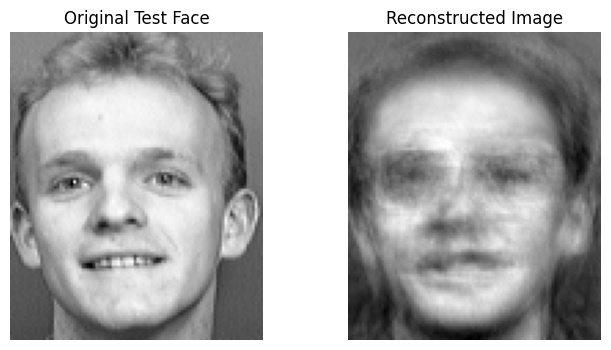

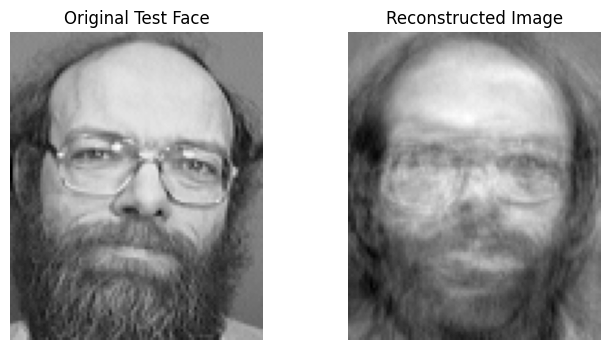

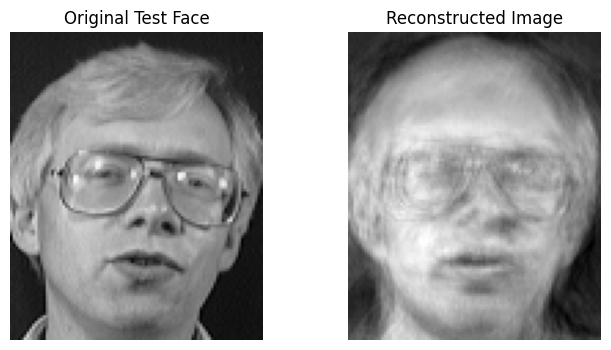

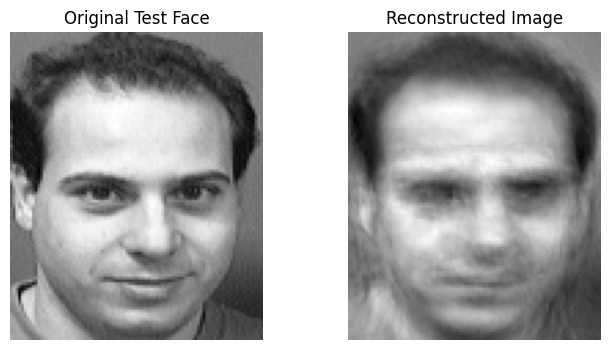

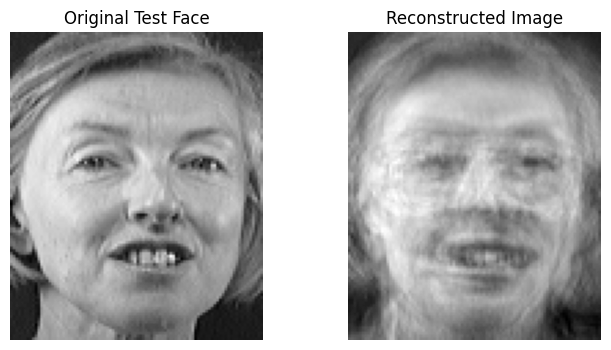

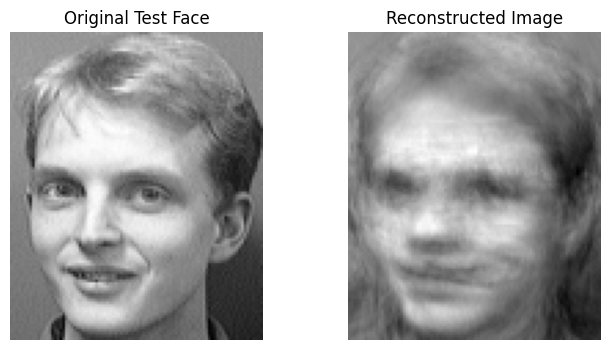

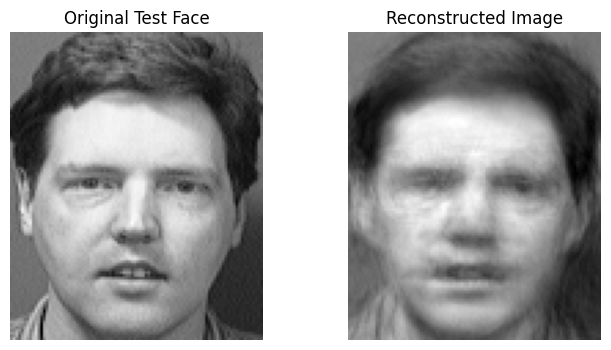

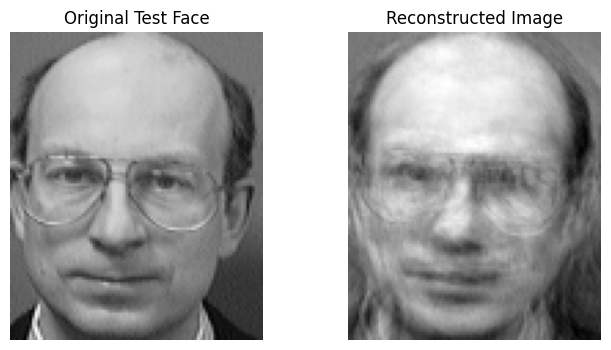

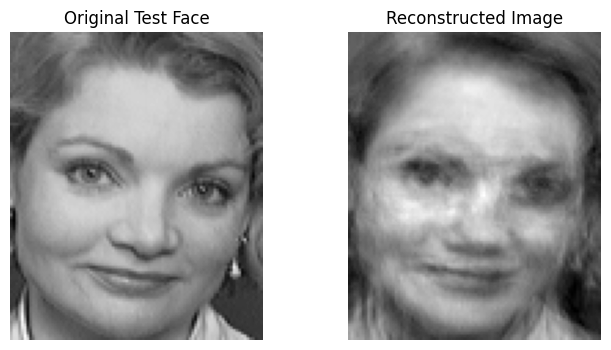

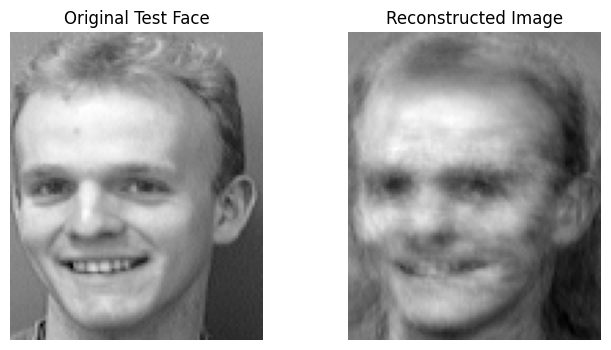

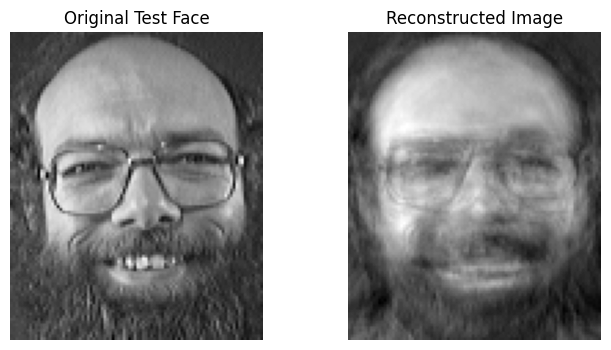

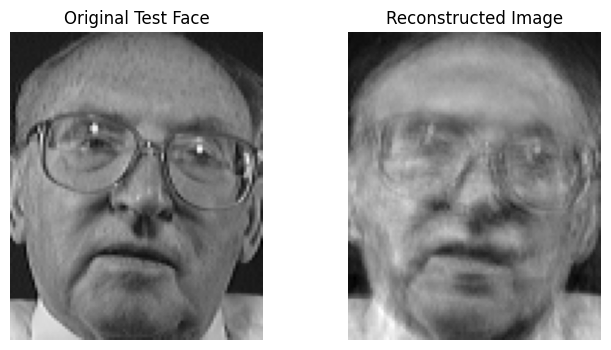

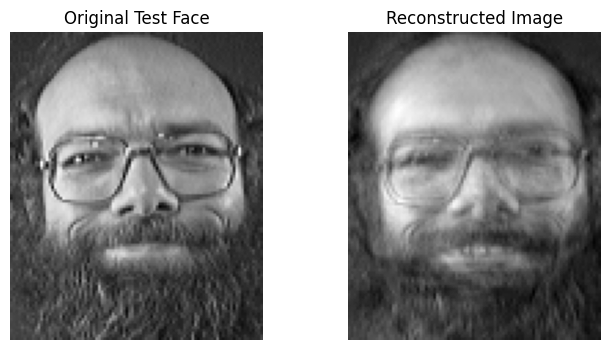

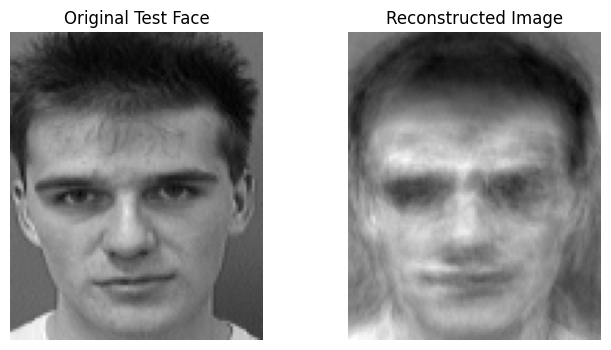

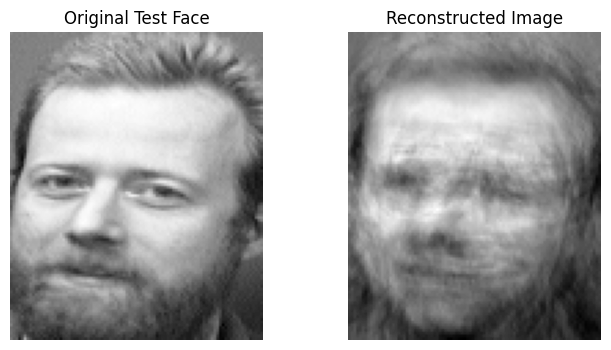

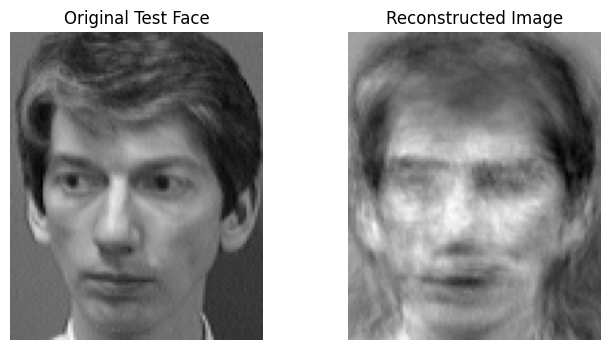

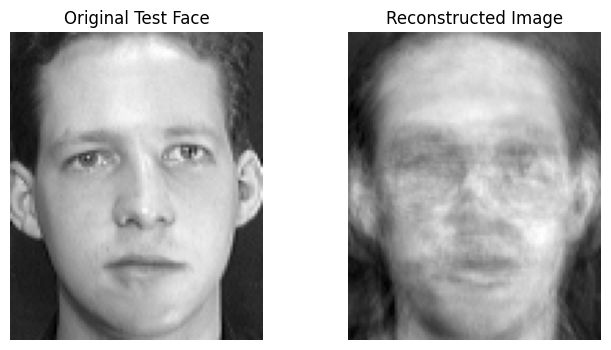

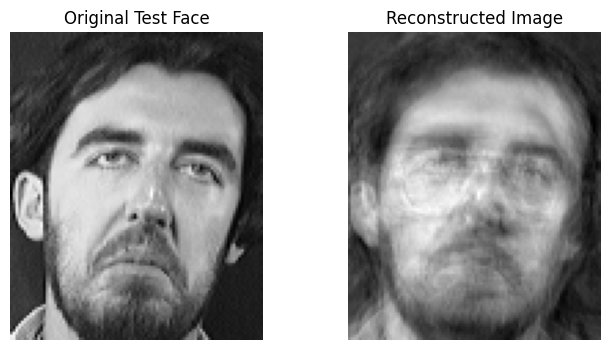

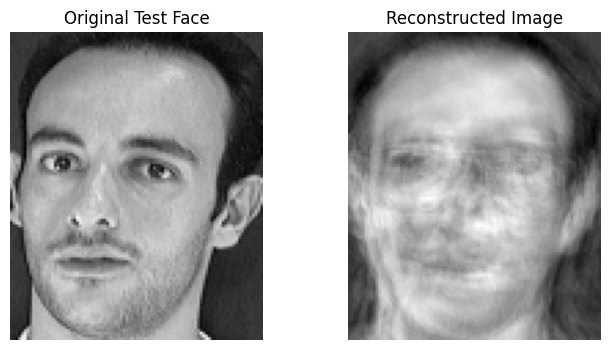

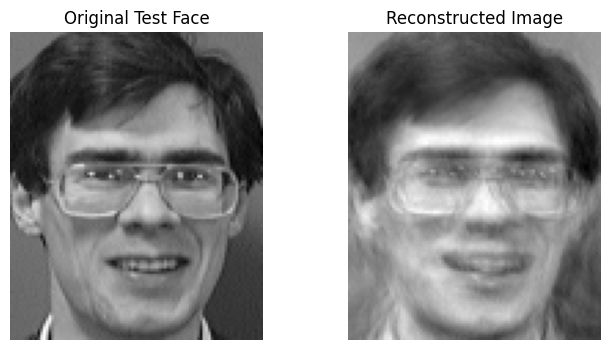

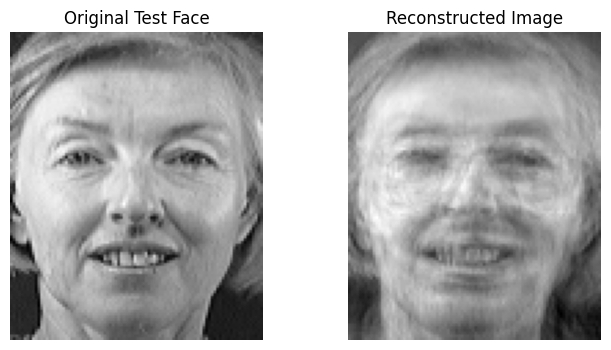

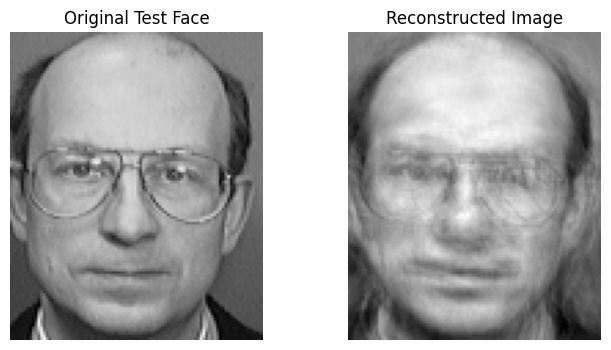

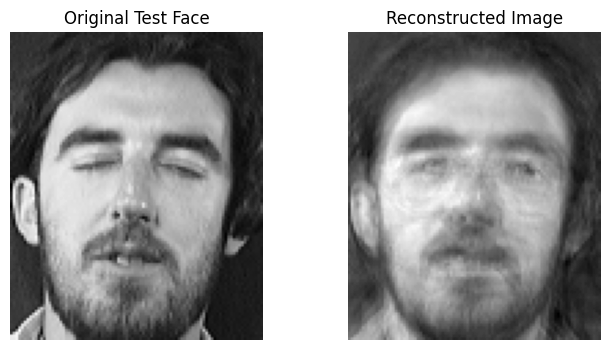

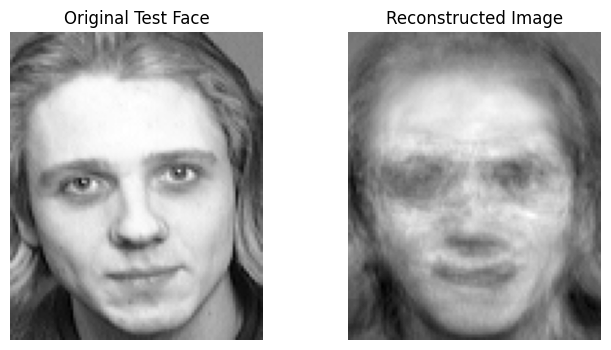

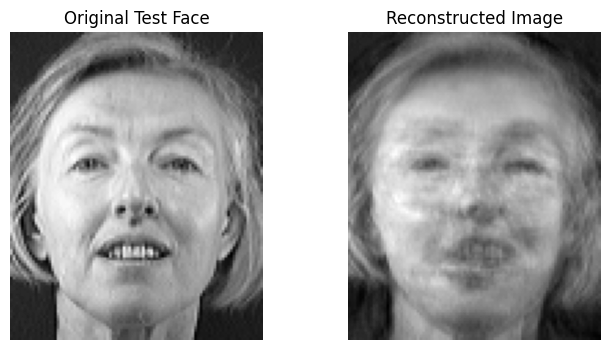

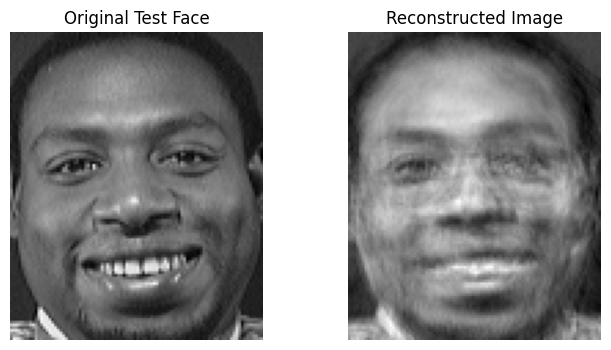

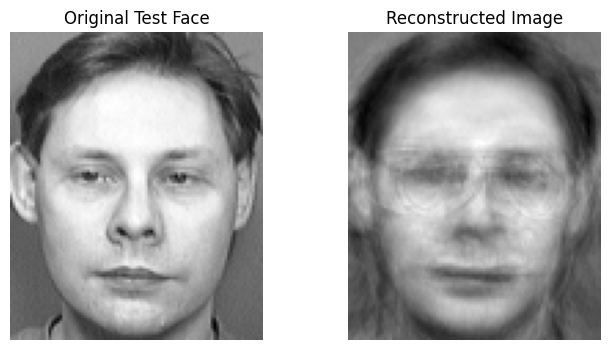

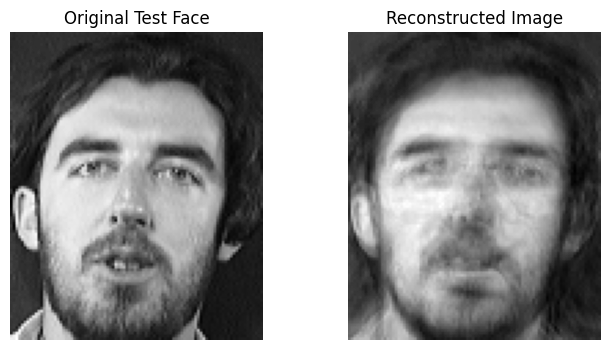

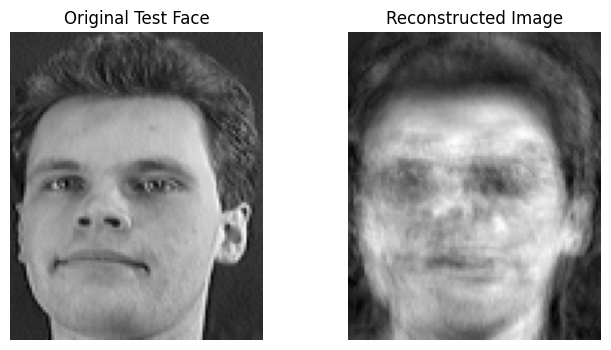

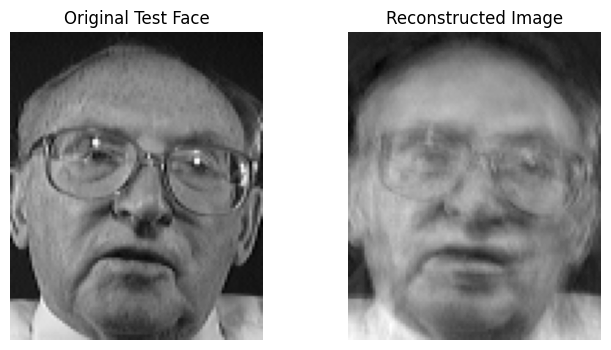

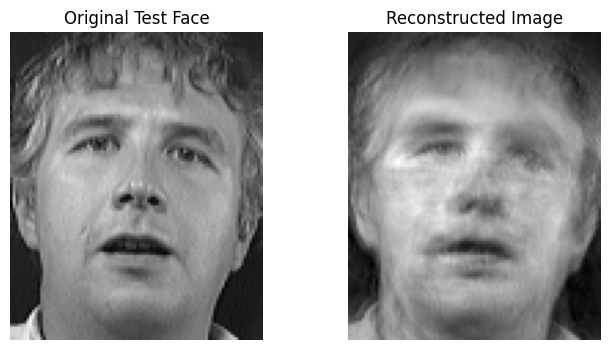

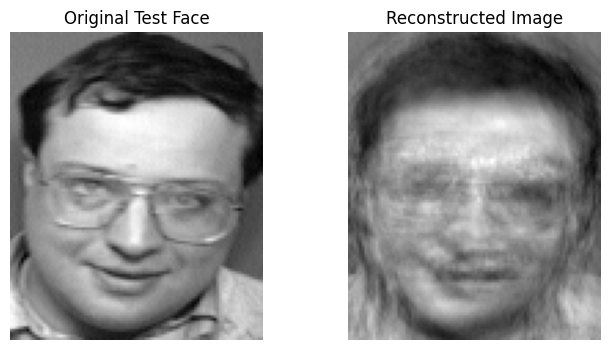

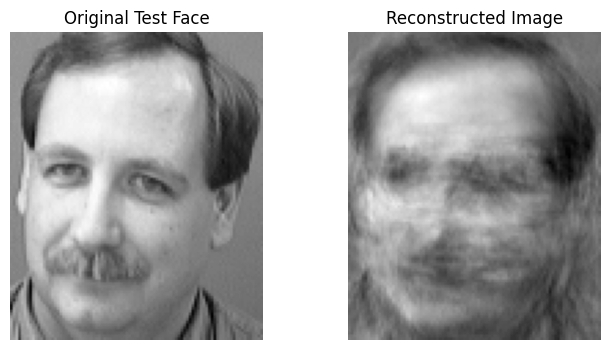

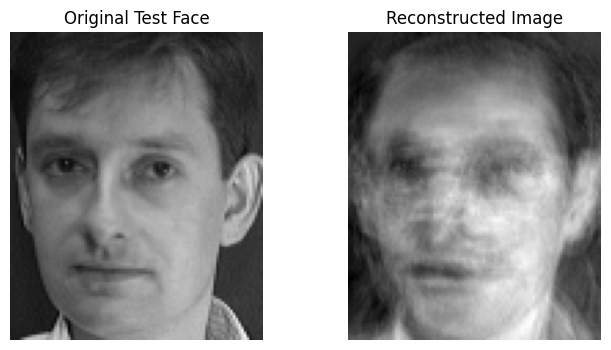

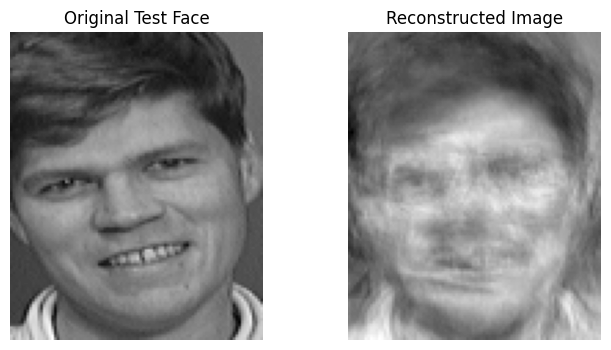

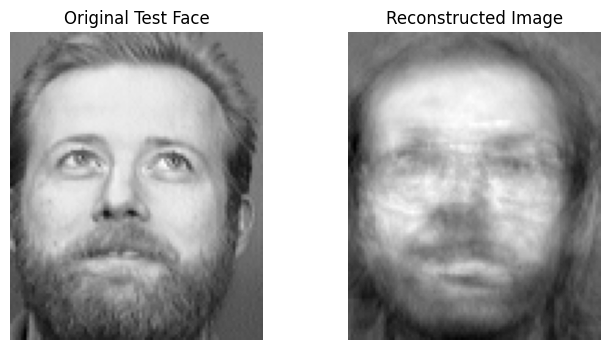

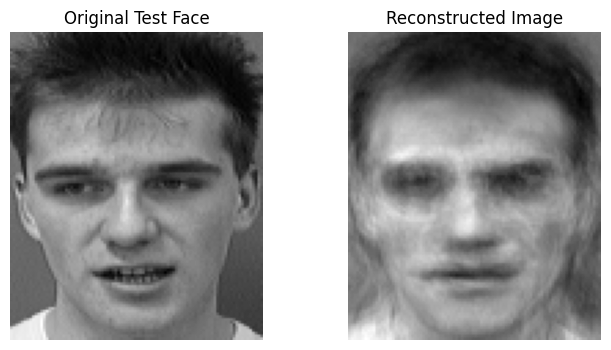

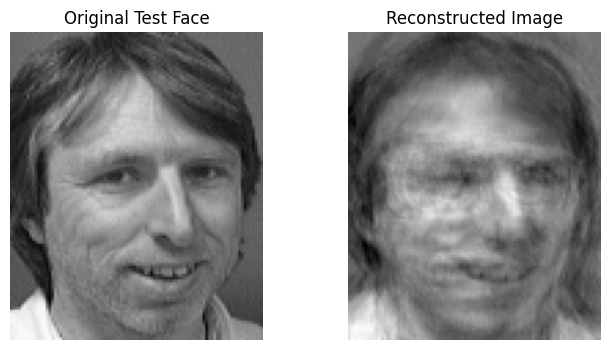

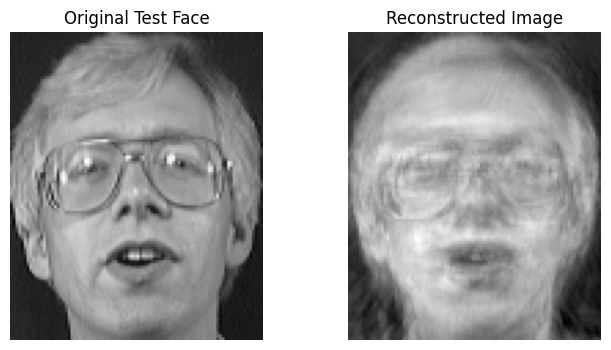

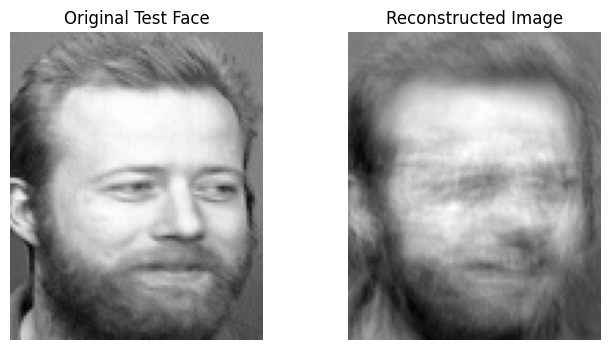

In [17]:
# plot recontructions here
%matplotlib inline
for i in range(40):
    reconstructed_image = imageReconstruction(testFaces[i],eigenfaces,meanFace)
    
    # the original test face vs the recontrusted 
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(testFaces[i], cmap='gray')
    plt.title('Original Test Face')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image.reshape(112, 92), cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')
    
    plt.show()

#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

5


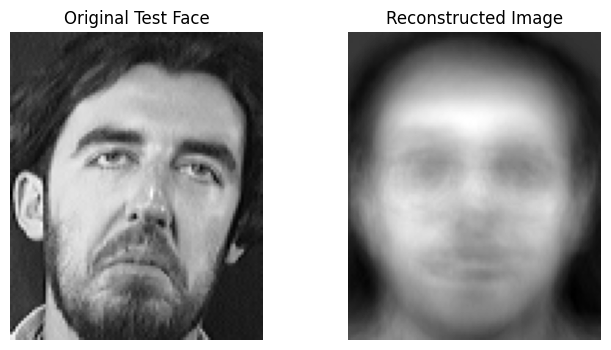

10


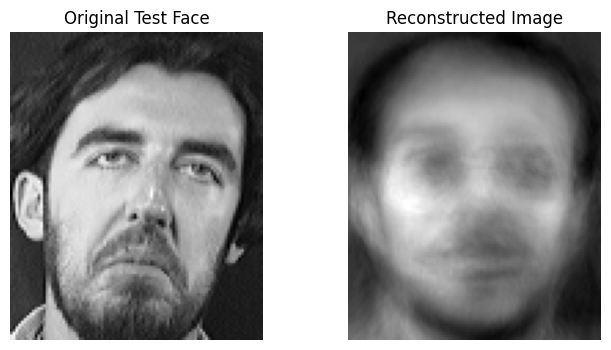

50


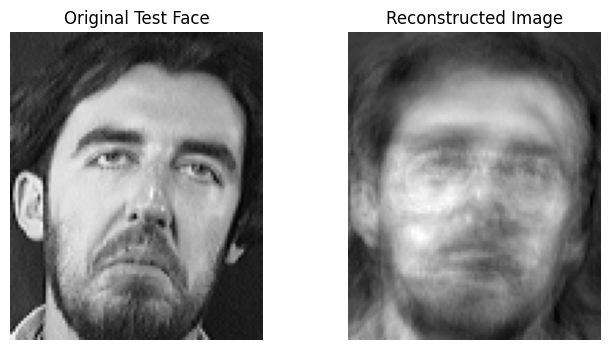

100


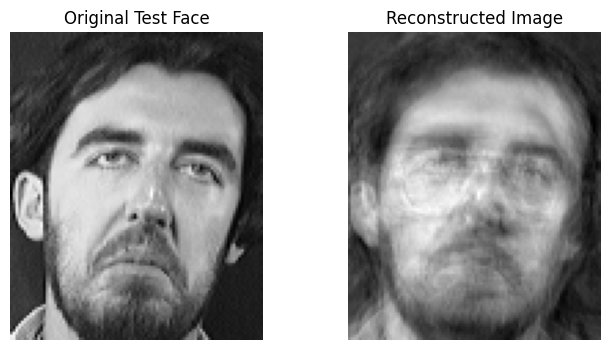

In [18]:
%matplotlib inline

def displayNfactors():
    pclist = [5,10,50,100]
    for k in pclist:
        keigenfaces = eigenfaces[-k:]
        print(k)
        i=17
        reconstructed_image = imageReconstruction(testFaces[i],keigenfaces,meanFace)
        
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(testFaces[i], cmap='gray')
        plt.title('Original Test Face')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(reconstructed_image.reshape(112, 92), cmap='gray')
        plt.title('Reconstructed Image')
        plt.axis('off')
        
        plt.show()

    return None

displayNfactors()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [21]:
def getClass(testFace,eigenFaces,trainmeanFace,trainFaces,trainLabels,testmeanface):
    """
    Arguments:
    1. Test image
    2. Eigenvectors
    3. Mean Eigen Face
    4. Training Set(X_train,y_train)

    The function must return the following:
    1. image with smallest error
    2. error value
    3. prediction class
    """

    # reconstructed_image = imageReconstruction(testFace,eigenFaces,trainmeanFace)
    # reshaped_image = reconstructed_image.reshape(112, 92)
    #trainFaces_reshaped = trainFaces.reshape(trainFaces.shape[0], -1)
    # temp = np.empty_like(trainFaces_reshaped)
    # for face in trainFaces:
    #     np.append(temp , imageReconstruction(face,eigenfaces,meanFace))
    testprojection = np.dot(reshape_arrayagain(testFace-trainmeanFace),eigenFaces.T)
    #errors = np.linalg.norm(trainFaces - reshaped_image, axis=1)
    trainprojection = np.dot(reshape_array(trainFaces - trainmeanFace), eigenFaces.T)
    distances = np.linalg.norm(testprojection - trainprojection,axis = 1)
    min_index = np.argmin(distances)
    #predicted_label = trainLabels[min_index]

    #finalerror = np.linalg.norm(testFace - trainFaces[min_index])
    
    return trainFaces[min_index], trainLabels[min_index]# // 10 + 1

def predicter(testLabels,testFaces,eigenFaces,trainmeanFace,trainLabels,trainFaces,k):
    total_error = 0
    correct_predictions = 0
    testmeanface = np.mean(testFaces, axis = 0)
    trainprojection = np.dot(reshape_array(trainFaces - trainmeanFace), eigenFaces.T)
    testprojection = np.dot(reshape_array(testFaces-testmeanface),eigenFaces.T)

    for testLabel,testFace in zip(testLabels,testFaces):
        # distance = np.linalg.norm(trainprojection - testFace, axis=1)
        # predicted_label = trainLabels[np.argmin(errors)]
        # if predicted_label == testLabel:
        #     correct_predictions += 1
        
        reconstructed_face,  predicted_class = getClass(testFace, eigenFaces, trainmeanFace, trainFaces, trainLabels,testmeanface)
        
        if testLabel == predicted_class:
            correct_predictions += 1

    mean_squared_error = mse_val  = np.mean(  (   reshape_array(testFaces-testmeanface) - np.dot(testprojection, eigenFaces)   )**2   )
    print("Accuracy for " , k , " Number of components = ", (correct_predictions*100)/40 )
    
    return mean_squared_error


    


In [20]:
components = [3,5,10,20,30,40,50]#,60,70,80,90,100]
mse = []

for numComponents in components:
    # your code here
    keigenfaces = eigenfaces[-numComponents:]
    mse.append(predicter(testLabels,testFaces,keigenfaces,meanFace,trainLabels,trainFaces,numComponents))

Accuracy for  3  Number of components =  72.5
Accuracy for  5  Number of components =  87.5
Accuracy for  10  Number of components =  95.0
Accuracy for  20  Number of components =  97.5
Accuracy for  30  Number of components =  97.5
Accuracy for  40  Number of components =  97.5
Accuracy for  50  Number of components =  97.5


Iterate through all the images in the test data and test the accuracy by taking different number of components

Plot Number of eigenvectors vs Mean Square Error

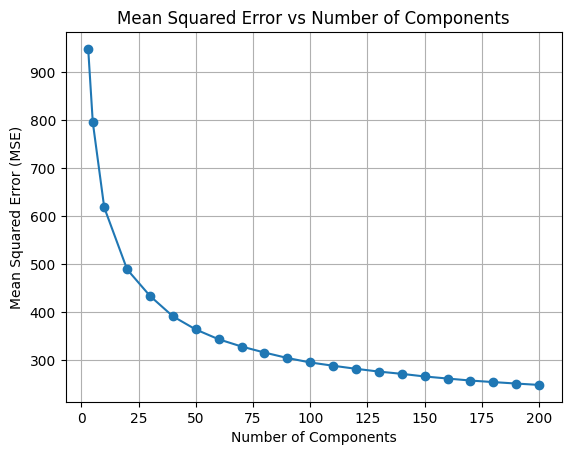

In [81]:
plt.plot(components, mse, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs Number of Components')
plt.grid(True)
plt.show()

Plot Number of eigenvectors vs Logarithmic Mean Square Error

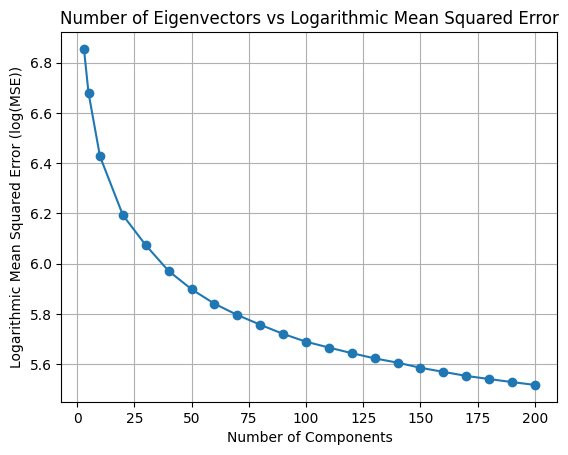

In [82]:
log_mse_values = np.log(mse)

plt.plot(components, log_mse_values, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Logarithmic Mean Squared Error (log(MSE))')
plt.title('Number of Eigenvectors vs Logarithmic Mean Squared Error')
plt.grid(True)
plt.show()